# Métodos de Ensemble

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Load CSV file into a DataFrame
df = pd.read_csv('new_data.csv')

# Display the first few rows of the DataFrame
print(df.head())


               Country ISO3   1961   1962   1963   1964   1965   1966   1967  \
0              Albania  ALB  0.627  0.326  0.075 -0.166 -0.388  0.559 -0.074   
1              Algeria  DZA  0.164  0.114  0.077  0.250 -0.100  0.433 -0.026   
2       American Samoa  ASM  0.079 -0.042  0.169 -0.140 -0.562  0.181 -0.368   
3               Angola  AGO  0.041 -0.152 -0.190 -0.229 -0.196  0.175 -0.081   
4  Antigua and Barbuda  ATG  0.090  0.031  0.288  0.214 -0.385  0.097 -0.192   

    1968  ...   2017   2018   2019   2020   2021   2022  \
0  0.081  ...  1.121  2.028  1.675  1.498  1.536  1.518   
1 -0.067  ...  1.512  1.210  1.115  1.926  2.330  1.688   
2 -0.187  ...  1.435  1.189  1.539  1.430  1.268  1.256   
3 -0.193  ...  0.870  1.395  1.752  1.162  1.553  1.212   
4 -0.225  ...  0.958  0.627  0.797  1.131  0.862  0.770   

                   Sub-Region         Income Group  Area (KM²)  Density (KM²)  
0       Europe & Central Asia  Upper middle income     28748.0            103  
1  M

In [3]:
df_num = df.select_dtypes(include= np.number)
df_num.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2015,2016,2017,2018,2019,2020,2021,2022,Area (KM²),Density (KM²)
0,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,...,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518,28748.0,103
1,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,...,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688,2381741.0,19
2,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,...,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256,199.0,220
3,0.041,-0.152,-0.190,-0.229,-0.196,0.175,-0.081,-0.193,0.188,0.248,...,1.331,1.609,0.870,1.395,1.752,1.162,1.553,1.212,1246700.0,29
4,0.090,0.031,0.288,0.214,-0.385,0.097,-0.192,-0.225,0.271,0.109,...,1.035,1.097,0.958,0.627,0.797,1.131,0.862,0.770,442.0,214


## Regressão Logística - Boosting : AdaBoost

In [4]:
X = df_num
y = df["Sub-Region"]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [8]:
# modelo de voting 

## instanciar nossos modelos de classificação
lr = LogisticRegression(random_state = 2, solver = "lbfgs")
svc = SVC(random_state = 2, max_iter = 10000, kernel = "poly", degree = 5, C = 10000)

modelo = VotingClassifier(
    [
        ("lr", lr), 
        ("svc", svc)
    ]
)

In [9]:
modelo.fit(X_train,y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [10]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

TREINO
                            precision    recall  f1-score   support

       East Asia & Pacific       0.00      0.00      0.00        17
     Europe & Central Asia       0.31      1.00      0.47        28
 Latin America & Caribbean       0.27      0.24      0.26        25
Middle East & North Africa       0.00      0.00      0.00        12
             North America       0.00      0.00      0.00         1
                South Asia       0.00      0.00      0.00         5
        Sub-Saharan Africa       0.00      0.00      0.00        24

                  accuracy                           0.30       112
                 macro avg       0.08      0.18      0.10       112
              weighted avg       0.14      0.30      0.18       112



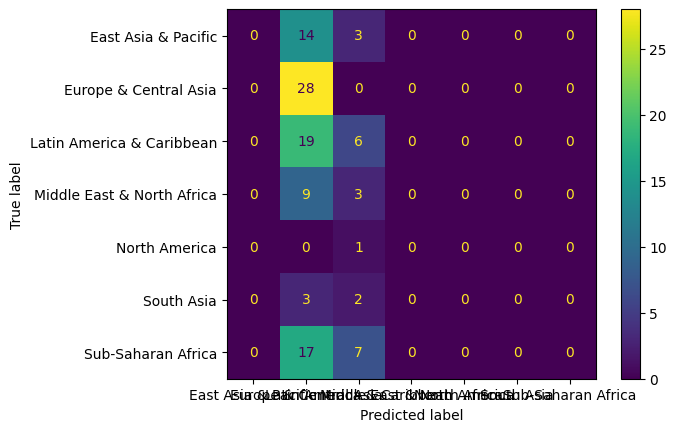



TESTE
                            precision    recall  f1-score   support

       East Asia & Pacific       0.00      0.00      0.00         4
     Europe & Central Asia       0.26      0.86      0.40         7
 Latin America & Caribbean       0.17      0.17      0.17         6
Middle East & North Africa       0.00      0.00      0.00         3
             North America       0.00      0.00      0.00         1
                South Asia       0.00      0.00      0.00         2
        Sub-Saharan Africa       0.00      0.00      0.00         6

                  accuracy                           0.24        29
                 macro avg       0.06      0.15      0.08        29
              weighted avg       0.10      0.24      0.13        29



C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

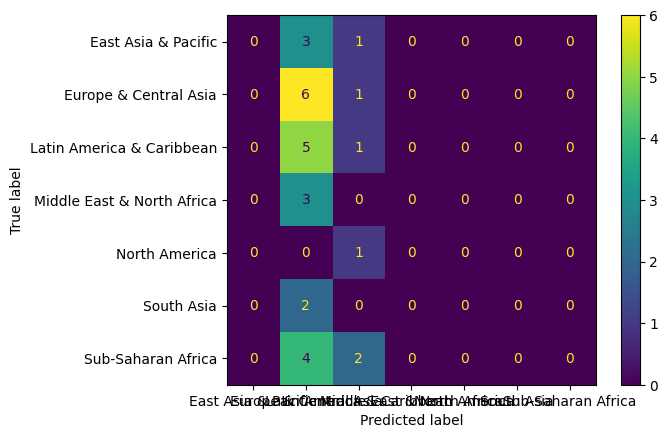

In [11]:
print("TREINO")
print(classification_report(y_train, y_pred_train))
print(ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train))
plt.show()

print("\n")
print("TESTE")
print(classification_report(y_test, y_pred_test))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test))

## Gradient boosting

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
gbc = GradientBoostingClassifier(
    learning_rate = 0.1, 
    n_estimators = 100,
    max_depth = 3
)

In [16]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [17]:
y_pred_train = gbc.predict(X_train)
y_pred_test = gbc.predict(X_test)

TREINO
                            precision    recall  f1-score   support

       East Asia & Pacific       1.00      1.00      1.00        17
     Europe & Central Asia       1.00      1.00      1.00        28
 Latin America & Caribbean       1.00      1.00      1.00        25
Middle East & North Africa       1.00      1.00      1.00        12
             North America       1.00      1.00      1.00         1
                South Asia       1.00      1.00      1.00         5
        Sub-Saharan Africa       1.00      1.00      1.00        24

                  accuracy                           1.00       112
                 macro avg       1.00      1.00      1.00       112
              weighted avg       1.00      1.00      1.00       112



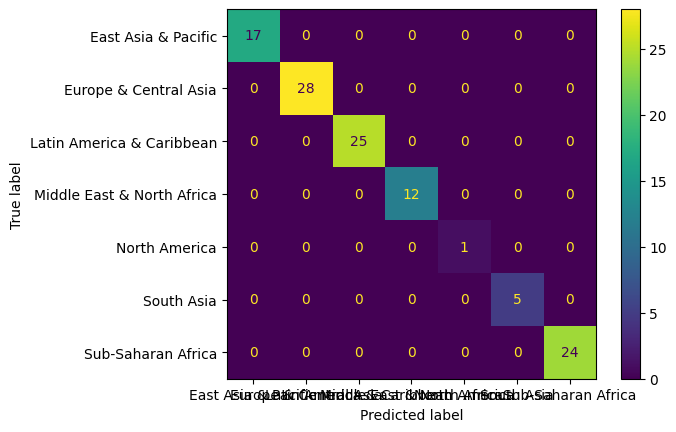

TESTE
                            precision    recall  f1-score   support

       East Asia & Pacific       1.00      0.50      0.67         4
     Europe & Central Asia       1.00      0.86      0.92         7
 Latin America & Caribbean       0.86      1.00      0.92         6
Middle East & North Africa       1.00      0.33      0.50         3
             North America       1.00      1.00      1.00         1
                South Asia       1.00      0.50      0.67         2
        Sub-Saharan Africa       0.55      1.00      0.71         6

                  accuracy                           0.79        29
                 macro avg       0.91      0.74      0.77        29
              weighted avg       0.88      0.79      0.78        29



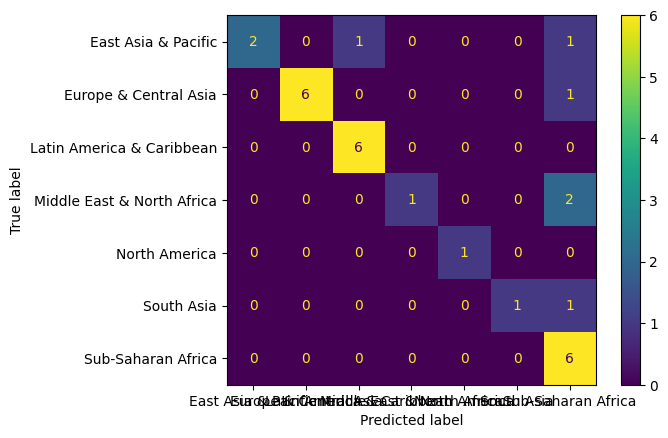

In [18]:
print("TREINO")
print(classification_report(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print("TESTE")
print(classification_report(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

## XGBoost

In [19]:
!pip install xgboost

In [20]:
df

,Country,ISO3,1961,1962,1963,1964,1965,1966,1967,1968,...,2017,2018,2019,2020,2021,2022,Sub-Region,Income Group,Area (KM²),Density (KM²)
0,Albania,ALB,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,...,1.121,2.028,1.675,1.498,1.536,1.518,Europe & Central Asia,Upper middle income,28748.0,103
1,Algeria,DZA,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,...,1.512,1.210,1.115,1.926,2.330,1.688,Middle East & North Africa,Lower middle income,2381741.0,19
2,American Samoa,ASM,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,...,1.435,1.189,1.539,1.430,1.268,1.256,East Asia & Pacific,High income,199.0,220
3,Angola,AGO,0.041,-0.152,-0.190,-0.229,-0.196,0.175,-0.081,-0.193,...,0.870,1.395,1.752,1.162,1.553,1.212,Sub-Saharan Africa,Lower middle income,1246700.0,29
4,Antigua and Barbuda,ATG,0.090,0.031,0.288,0.214,-0.385,0.097,-0.192,-0.225,...,0.958,0.627,0.797,1.131,0.862,0.770,Latin America & Caribbean,High income,442.0,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,United States,USA,0.003,-0.026,0.418,-0.282,-0.362,-0.214,0.076,-0.073,...,1.433,1.276,1.034,1.324,1.144,1.217,North America,High income,9372610.0,37
137,Uruguay,URY,0.398,-0.473,0.330,-0.762,0.180,-0.421,0.019,0.385,...,1.546,1.196,0.766,0.890,0.790,0.382,Latin America & Caribbean,High income,181034.0,20
138,Vanuatu,VUT,0.168,0.092,-0.165,0.220,-0.569,-0.270,-0.144,-0.288,...,1.131,0.613,0.897,1.226,1.147,1.479,East Asia & Pacific,Lower middle income,12189.0,27
139,Zambia,ZMB,0.228,-0.168,-0.390,-0.279,-0.418,0.300,-0.014,-0.130,...,0.105,0.648,0.855,0.891,0.822,0.686,Sub-Saharan Africa,Lower middle income,752612.0,28


In [21]:
from sklearn.preprocessing import LabelEncoder

enconder = LabelEncoder()
y_target = enconder.fit_transform(df["Sub-Region"])

In [22]:
y_target
X = df_num

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size = 0.2, stratify = y, random_state = 2)

In [25]:
from xgboost import XGBClassifier


In [26]:
xgb = XGBClassifier()

In [27]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [28]:
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

TREINO
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        24

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



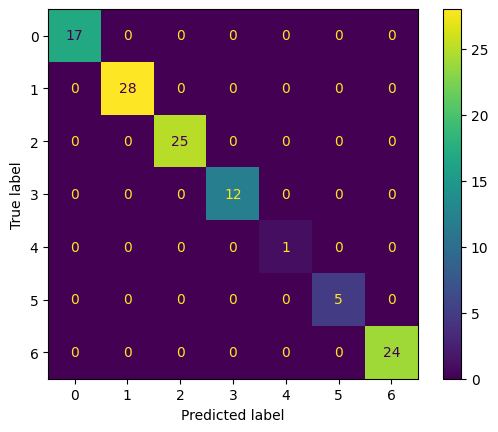

TESTE
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.83      0.71      0.77         7
           2       0.56      0.83      0.67         6
           3       0.50      0.67      0.57         3
           4       0.00      0.00      0.00         1
           5       1.00      0.50      0.67         2
           6       1.00      0.83      0.91         6

    accuracy                           0.69        29
   macro avg       0.63      0.58      0.58        29
weighted avg       0.71      0.69      0.69        29



C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

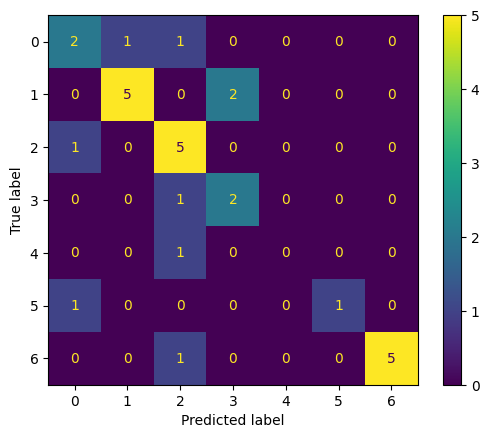

In [29]:
print("TREINO")
print(classification_report(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print("TESTE")
print(classification_report(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [30]:
from xgboost import plot_importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

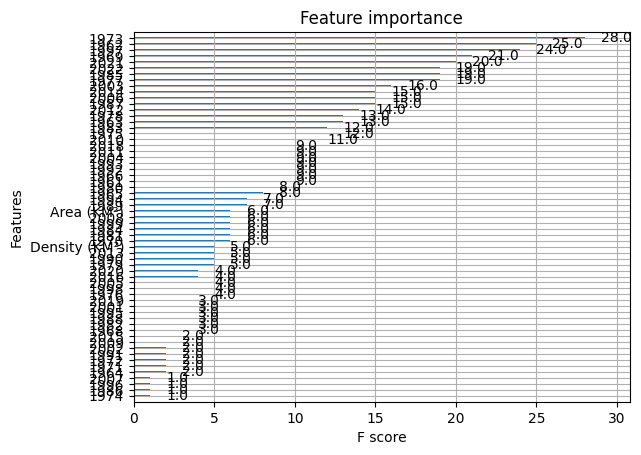

In [31]:
plot_importance(xgb)

## LGBM

In [ ]:
!pip install lightgbm



In [32]:
from lightgbm import LGBMClassifier

In [33]:
lgbm = LGBMClassifier()

In [34]:
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2347
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 64
[LightGBM] [Info] Start training from score -1.885286
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.499623
[LightGBM] [Info] Start training from score -2.233592
[LightGBM] [Info] Start training from score -4.718499
[LightGBM] [Info] Start training from score -3.109061
[LightGBM] [Info] Start training from score -1.540445
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

LGBMClassifier()

In [35]:
y_pred_train = lgbm.predict(X_train)
y_pred_test = lgbm.predict(X_test)

TREINO
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        24

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



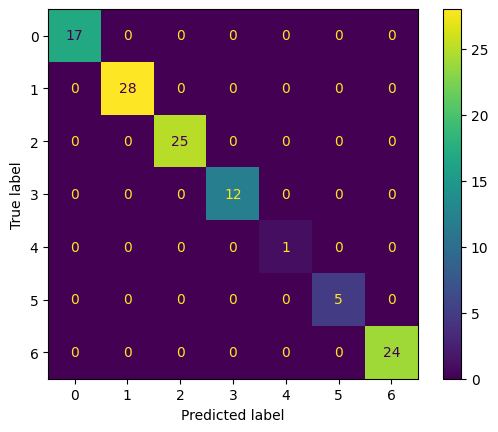

TESTE
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.83      0.71      0.77         7
           2       0.62      0.83      0.71         6
           3       0.50      0.67      0.57         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.86      1.00      0.92         6

    accuracy                           0.69        29
   macro avg       0.47      0.53      0.50        29
weighted avg       0.63      0.69      0.65        29



C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

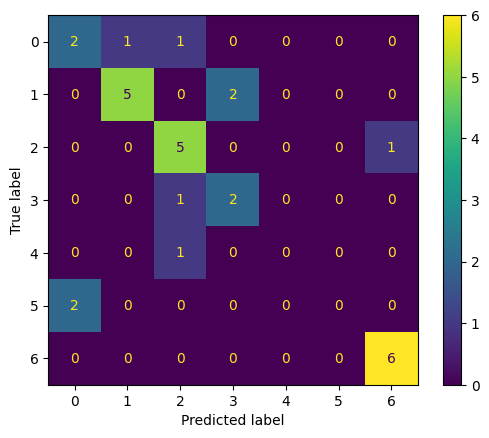

In [36]:
print("TREINO")
print(classification_report(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print("TESTE")
print(classification_report(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()